In [1]:
import numpy as np
import scipy.linalg
from scipy.stats import ortho_group
from scipy.io import loadmat
from localizer import Localizer
import psi4
import json

#https://github.com/molmod/molmod
from molmod.units import angstrom, debye

import matplotlib.pyplot as plt

#importing the QM7 database
# data = dict(loadmat('../molecule_geometries/qm7.mat'))
# Z = data['Z'] # numbers
# R = data['R']/angstrom # positions in angstrom

#importing the centered QM7 database
# Z = np.load('../data/molecule_geometries/qm7_Z.npy')
# R = np.load('../data/molecule_geometries/qm7_R_centered.npy')

#final dataset
Z = np.load('../data/molecule_geometries/benchmarking_dataset_Z.npy')
R = np.load('../data/molecule_geometries/benchmarking_dataset_R.npy')
qm7_idxs = np.load('../data/molecule_geometries/benchmark_idxs.npy')

# Molecule order: H2O,CO2,HCN,Acetonitrile,H2SO4,Benzene,Diborane
numbers = np.load('../data/molecule_geometries/nuclei_numbers.npy')
positions = np.load('../data/molecule_geometries/positions.npy')

In [2]:
with open('../data/benchmarking/hpc_run3/V5/V5_sweep_0_500.json', 'r') as read_file:
    data = json.load(read_file)
# print(data[52])

In [23]:
with open('../data/benchmarking/hpc_run3/V2/V2_sweep_0_500.json', 'r') as read_file:
    data = json.load(read_file)
# print(data[52])

In [13]:
with open('../data/benchmarking/hpc_run2/PM/PM_0_500.json', 'r') as read_file:
    data = json.load(read_file)
# print(data[52])

In [20]:
with open('../data/benchmarking/hpc_run2/FB/FB_0_500.json', 'r') as read_file:
    data = json.load(read_file)
# print(data[52])

In [25]:
with open('../data/benchmarking/hpc_run2/ER/ER_0_10.json', 'r') as read_file:
    data = json.load(read_file)
# print(data[52])

In [6]:
with open('../data/benchmarking/hpc_run2/V4/V4_0_500_full.json', 'r') as read_file:
    data = json.load(read_file)
# print(data[52])

In [41]:
for i in range(1,501):
    if -data[i]['ValueCostV4'] > 1e-02:
        print(i-1)

31
76


In [52]:
conv = []
for i in range(1,501):
    sweep_dict = data[i]['SweepDict']
    conv_idxs = np.where(np.array(sweep_dict['OptimizerConv']) > 0)
    opt = np.array(sweep_dict['OptimizerConv'])[conv_idxs]
    if opt[-1] > 1e+05:
        conv.append(i)

In [52]:
quad = np.zeros((500,3,3))
quad_loc = np.zeros((500,3,3))
for i in range(1,501):
    sweep_dict = data[i]['SweepDict']
    conv_idxs = np.where(np.array(sweep_dict['OptimizerConv']) > 0)
    final_it_idx = conv_idxs[-1]
    quad[i-1] = np.array(data[i]['QuadTotal'])
    quad_loc[i-1] = np.array(data[i]['QuadLocal'])

In [34]:
with open('../data/benchmarking/hpc_run2/PM/PM_0_500.json', 'r') as read_file:
    data = json.load(read_file)
# print(data[52])

In [ ]:
conv = []
for i in range(1,301):
    conv.append(data[i]['Convergence'])
    if conv[i-1] == False:
        print('No convergence for molecule: ' + str(i))

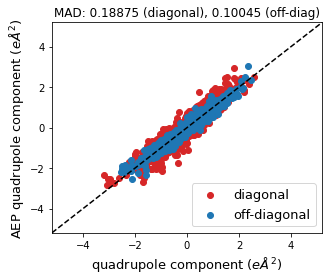

In [21]:
quad = np.zeros((500,3,3))
quad_loc = np.zeros((500,3,3))
for i in range(1,501):
    quad[i-1] = np.array(data[i]['QuadTotal'])
    quad_loc[i-1] = np.array(data[i]['QuadLocal'])

diag = np.array([])
off_diag = np.array([])
for comp in quad:
    diag = np.append(diag, comp[[0,1,2],[0,1,2]])
    off_diag = np.append(off_diag, comp[[0,0,1],[1,2,2]])

diag_loc = np.array([])
off_diag_loc = np.array([])
for comp in quad_loc:
    diag_loc = np.append(diag_loc, comp[[0,1,2],[0,1,2]])
    off_diag_loc = np.append(off_diag_loc, comp[[0,0,1],[1,2,2]])

diag_diff = diag - diag_loc
off_diff = off_diag - off_diag_loc

diag_mdev = np.mean(np.abs(diag_diff))
off_mdev = np.mean(np.abs(off_diff))

fig, (ax1) = plt.subplots(1,1,figsize=(4.7,4))
# fig.suptitle('Mean Dev=' + str(mdev)[0:4] +' 1/cm ' + 'RMSD = ' + str(rmsd)[0:5] + ' 1/cm')
x = np.linspace(-5.2,5.2,len(diag))
ax1.plot(x,x, 'k--')
ax1.scatter(diag, diag_loc,
            c='C3', marker='o', label='diagonal')
ax1.scatter(off_diag, off_diag_loc,
            marker='o', label='off-diagonal')
ax1.set_xlabel('quadrupole component ($e\AA^2$)', fontsize=13)
ax1.set_ylabel('AEP quadrupole component ($e\AA^2$)', fontsize=13)
ax1.set_ylim(-5.2,5.2)
ax1.set_xlim(-5.2,5.2)
ax1.set_title('MAD: ' + str(diag_mdev)[:7] + ' (diagonal), ' +
              str(off_mdev)[:7] + ' (off-diag)')
ax1.legend(loc='lower right', fontsize=13)
fig.tight_layout()
# plt.savefig('../data/figures/plots/hpc_run2/FB_quadrupole_0_500', dpi=350)

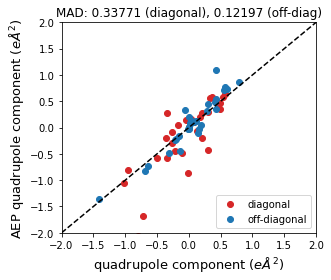

In [18]:
quad = np.zeros((11,3,3))
quad_loc = np.zeros((11,3,3))
for i in range(1,12):
    quad[i-1] = np.array(data[i]['QuadTotal'])
    quad_loc[i-1] = np.array(data[i]['QuadLocal'])

diag = np.array([])
off_diag = np.array([])
for comp in quad:
    diag = np.append(diag, comp[[0,1,2],[0,1,2]])
    off_diag = np.append(off_diag, comp[[0,0,1],[1,2,2]])

diag_loc = np.array([])
off_diag_loc = np.array([])
for comp in quad_loc:
    diag_loc = np.append(diag_loc, comp[[0,1,2],[0,1,2]])
    off_diag_loc = np.append(off_diag_loc, comp[[0,0,1],[1,2,2]])

diag_diff = diag - diag_loc
off_diff = off_diag - off_diag_loc

diag_mdev = np.mean(np.abs(diag_diff))
off_mdev = np.mean(np.abs(off_diff))
mdev = (diag_mdev + off_mdev)/2.

fig, (ax1) = plt.subplots(1,1,figsize=(4.7,4))
# fig.suptitle('Mean Dev=' + str(mdev)[0:4] +' 1/cm ' + 'RMSD = ' + str(rmsd)[0:5] + ' 1/cm')
x = np.linspace(-2,2,len(diag))
ax1.plot(x,x, 'k--')
ax1.scatter(diag, diag_loc,
            c='C3', marker='o', label='diagonal')
ax1.scatter(off_diag, off_diag_loc,
            marker='o', label='off-diagonal')
ax1.set_xlabel('quadrupole component ($e\AA^2$)', fontsize=13)
ax1.set_ylabel('AEP quadrupole component ($e\AA^2$)', fontsize=13)
ax1.set_ylim(-2,2)
ax1.set_xlim(-2,2)
ax1.set_title('MAD: ' + str(diag_mdev)[:7] + ' (diagonal), ' +
              str(off_mdev)[:7] + ' (off-diag)')
ax1.legend(loc='lower right')
fig.tight_layout()
# plt.savefig('../data/figures/plots/hpc_run2/PM_quadrupole_0_10', dpi=350)

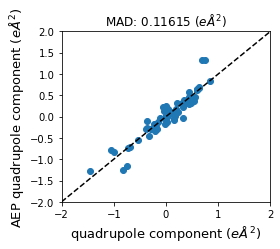

In [26]:
quad = np.zeros((11,3,3))
quad_loc = np.zeros((11,3,3))
for i in range(1,12):
    quad[i-1] = np.array(data[i]['QuadTotal'])
    quad_loc[i-1] = np.array(data[i]['QuadLocal'])

diag = np.array([])
off_diag = np.array([])
for comp in quad:
    diag = np.append(diag, comp[[0,1,2],[0,1,2]])
    off_diag = np.append(off_diag, comp[[0,0,1],[1,2,2]])

diag_loc = np.array([])
off_diag_loc = np.array([])
for comp in quad_loc:
    diag_loc = np.append(diag_loc, comp[[0,1,2],[0,1,2]])
    off_diag_loc = np.append(off_diag_loc, comp[[0,0,1],[1,2,2]])

diag_diff = diag - diag_loc
off_diff = off_diag - off_diag_loc

diag_mdev = np.mean(np.abs(diag_diff))
off_mdev = np.mean(np.abs(off_diff))
mdev = (diag_mdev + off_mdev)/2.

fig, (ax1) = plt.subplots(1,1,figsize=(4,3.5))
# fig.suptitle('Mean Dev=' + str(mdev)[0:4] +' 1/cm ' + 'RMSD = ' + str(rmsd)[0:5] + ' 1/cm')
x = np.linspace(-2,2,len(diag))
ax1.plot(x,x, 'k--')
ax1.scatter(diag, diag_loc,
            c='C0', marker='o', label='diagonal')
ax1.scatter(off_diag, off_diag_loc,
            c='C0',marker='o', label='off-diagonal')
ax1.set_xlabel('quadrupole component ($e\AA^2$)', fontsize=13)
ax1.set_ylabel('AEP quadrupole component ($e\AA^2$)', fontsize=13)
ax1.set_ylim(-2,2)
ax1.set_xlim(-2,2)
# ax1.set_title('MAD: ' + str(diag_mdev)[:7] + ' (diagonal), ' +
#               str(off_mdev)[:7] + ' (off-diag)')
ax1.set_title('MAD: ' + str(mdev)[:7] + ' $(e\AA^2)$')
# ax1.legend(loc='lower right')
fig.tight_layout()
# plt.savefig('../data/figures/plots/hpc_run2/ER_quadrupole_0_10_mad', dpi=350)

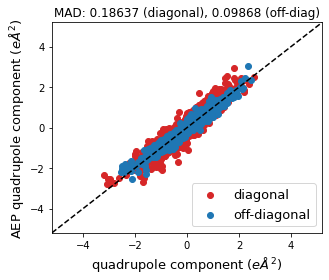

In [24]:
quad = np.zeros((500,3,3))
quad_loc = np.zeros((500,3,3))
for i in range(1,501):
    quad[i-1] = np.array(data[i]['FinalQuadTotal'])
    quad_loc[i-1] = np.array(data[i]['FinalQuadLocal'])

diag = np.array([])
off_diag = np.array([])
for comp in quad:
    diag = np.append(diag, comp[[0,1,2],[0,1,2]])
    off_diag = np.append(off_diag, comp[[0,0,1],[1,2,2]])

diag_loc = np.array([])
off_diag_loc = np.array([])
for comp in quad_loc:
    diag_loc = np.append(diag_loc, comp[[0,1,2],[0,1,2]])
    off_diag_loc = np.append(off_diag_loc, comp[[0,0,1],[1,2,2]])

diag_diff = diag - diag_loc
off_diff = off_diag - off_diag_loc

diag_mdev = np.mean(np.abs(diag_diff))
off_mdev = np.mean(np.abs(off_diff))

fig, (ax1) = plt.subplots(1,1,figsize=(4.7,4))
# fig.suptitle('Mean Dev=' + str(mdev)[0:4] +' 1/cm ' + 'RMSD = ' + str(rmsd)[0:5] + ' 1/cm')
x = np.linspace(-5.2,5.2,len(diag))
ax1.plot(x,x, 'k--')
ax1.scatter(diag, diag_loc,
            c='C3', marker='o', label='diagonal')
ax1.scatter(off_diag, off_diag_loc,
            marker='o', label='off-diagonal')
ax1.set_xlabel('quadrupole component ($e\AA^2$)', fontsize=13)
ax1.set_ylabel('AEP quadrupole component ($e\AA^2$)', fontsize=13)
ax1.set_ylim(-5.2,5.2)
ax1.set_xlim(-5.2,5.2)
ax1.set_title('MAD: ' + str(diag_mdev)[:7] + ' (diagonal), ' +
              str(off_mdev)[:7] + ' (off-diag)')
ax1.legend(loc='lower right',fontsize=13)
fig.tight_layout()
# plt.savefig('../data/figures/plots/hpc_run2/V2_quadrupole_0_500', dpi=350)

## Finding optimal weight factors

In [15]:
opt_weight = []
for i in range(1,501):
    nonzero_idx = np.where(np.array(data[i]['SweepDict']['RootMeanDisplacement']) > 0.)[-1][-1]
    opt_weight.append(data[i]['SweepDict']['PenaltyVals'][nonzero_idx])
# print(opt_weight)

np.save('../data/benchmarking/hpc_run3/V5/opt_weights', np.array(opt_weight))

## Histogram plot

In [ ]:
data[1]

In [9]:
diff_costv4 = []
fb_costv4 = []
v2_costv4 = []
for i in range(1,501):
    nonzero_idx = np.where(np.array(data[i]['SweepDict']['RootMeanDisplacement']) > 0.)[-1][-1]
    diff_costv4.append(data[i]['SweepDict']['V4CostVals'][nonzero_idx]-
                       data[i]['SweepDict']['V4CostVals'][0])
    fb_costv4.append(-data[i]['SweepDict']['V4CostVals'][0])
    v2_costv4.append(-data[i]['SweepDict']['V4CostVals'][nonzero_idx])
diff_costv4 = np.array(diff_costv4)
fb_costv4 = np.array(fb_costv4)
v2_costv4 = np.array(v2_costv4)

In [10]:
np.shape(np.where(np.array(diff_costv4)<0.))

(1, 193)

In [54]:
np.shape(np.where(np.array(diff_costv4)>0.))

(1, 307)

In [75]:
np.mean(np.array(diff_costv4))

0.03168169919566831

In [152]:
307/500

0.614

In [76]:
np.std(np.array(diff_costv4))

0.14991444151120112

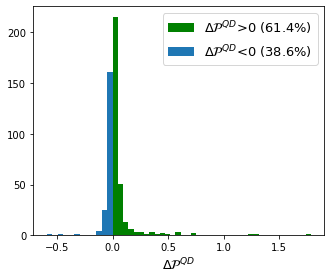

In [11]:
pos_idx = np.where(diff_costv4 > 0.)
neg_idx = np.where(diff_costv4 < 0.)
fig, (ax) = plt.subplots(1,1,figsize=(4.7,4))
trash = ax.hist(diff_costv4[pos_idx], bins=38, color='g', label=r'$\Delta\mathcal{P}^{QD}$>0 (61.4%)')
trash = ax.hist(diff_costv4[neg_idx], bins=12, label=r'$\Delta\mathcal{P}^{QD}$<0 (38.6%)')
# ax.text(.6,.6,r'#$\Delta\mathcal{P}^{QD}(\mathbf{W})$', transform=ax.transAxes, size=15)
ax.set_xlabel(r'$\Delta\mathcal{P}^{QD}$',fontsize=13)
ax.legend(fontsize=13)
fig.tight_layout()
plt.savefig('../data/figures/plots/hpc_run2/V2_histogram', dpi=350)

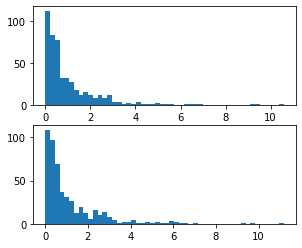

In [43]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(4.7,4))
# plt.hist(diff_costv4, bins=50)
trash = ax1.hist(v2_costv4, bins=50)
trash = ax2.hist(fb_costv4, bins=50)

## Parameter sweep plot

In [ ]:
data[20]

In [148]:
(0.18637 + 0.09868)/2.

0.142525

In [149]:
(.18875+.10045)/2.

0.1446

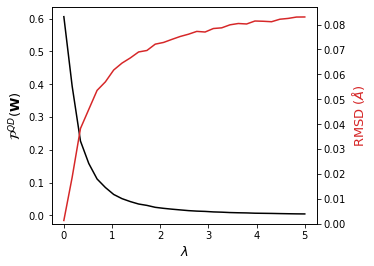

In [4]:
idx = 6
nonzero_idxs = np.where(np.array(data[idx]['SweepDict']['V4CostVals']) < 0.)
penalty = np.array(data[idx]['SweepDict']['PenaltyVals'])[nonzero_idxs]
cost_vals = -np.array(data[idx]['SweepDict']['V4CostVals'])[nonzero_idxs]
dist_rmd = np.array(data[idx]['SweepDict']['RootMeanDisplacement'])[nonzero_idxs]

fig, (ax1) = plt.subplots(1,1,figsize=(5.3,3.8))

lns1 = ax1.plot(penalty, cost_vals,c='k', label=r'$\mathcal{P}^{QD}(\mathbf{W})$')
ax1.set_ylabel(r'$\mathcal{P}^{QD}(\mathbf{W})$',fontsize=13)
ax1.set_xlabel('$\lambda$', fontsize=13)
# ax1.tick_params(axis='y', color='C0')
# ax1.set_yscale('log')

ax2 = ax1.twinx()
lns2 = ax2.plot(penalty,dist_rmd, c='C3', label='RMD')
ax2.set_ylabel('RMSD ($\AA$)', fontsize=13, color='C3')
ax2.set_ylim(0)

# leg = lns1 + lns2
# labs = [l.get_label() for l in leg]
# leg = ax2.legend(leg, labs, bbox_to_anchor=(0.5, 0., 0.5, 0.5), fontsize=13)

fig.tight_layout()
# plt.savefig('../data/figures/plots/hpc_run2/V5_sweep_idx_' + str(idx), dpi=350)

## Glueing jsons together

In [8]:
data = data1
for i in range(1,151):
    data.append(data2[i])
for i in range(1,151):
    data.append(data3[i])

with open('../data/benchmarking/hpc_run3/V2/V2_sweep_0_500.json', 'w') as fout:
    json.dump(data, fout)
fout.close()

In [13]:
data = data1
for i in range(1,5):
    data.append(data2[i])

with open('../data/benchmarking/hpc_run2/ER/ER_0_10.json', 'w') as fout:
    json.dump(data, fout)
fout.close()

## Fixing missing entries

In [27]:
missing_idx = []
for i in range(1,501):
    if not data[i]['Convergence']:
        print(i-1)
        missing_idx.append(i-1)

for idx in missing_idx:
    loc = Localizer(Z[idx], R[idx], index=qm7_idxs[idx], lot='scf',
                    check_import=True, cores=4, memory=6e+09, basisset='aug-cc-pvtz')
    loc.set_scheme('V4')
    conv = loc.optimize_line_search(nsteps=500, psi4_guess=False)
    
    if conv:
        output_dict = {'Convergence' : conv,
                       'QuadCompare' : loc.compare_quadrupole().tolist(),
                       'QuadTotal' : loc.total_quadrupole.tolist(),
                       'QuadLocal' : loc.total_loc_quadrupole.tolist(),
                       'ValueCostV4' : float(loc.V4_cost(loc.W))}
        loc.write_centers(folder= '../data/xyz_files/hpc_run2/')

        data[idx+1] = output_dict

with open('../data/benchmarking/hpc_run2/V4/V4_0_500_full.json', 'w') as fout:
    json.dump(data, fout)
fout.close()

## Generate ER data

In [2]:
with open('../data/benchmarking/hpc_run2/ER/ER_0_2.json', 'r') as read_file:
    output_list = json.load(read_file)
# print(data[52])

In [2]:
output_list = [{'BasisSet' : '6-311ppg_d_p_',
                'LevelOfTheory' : 'scf',
                'Scheme' : 'ER',
                'Penalty' : 0.,
                'StartIndex' : 0,
                'StopIndex' : 7,
                'Cores' : 4,
                'Memory' : 7.}]

In [ ]:
idx = 1
loc = Localizer(Z[idx], R[idx], index=qm7_idxs[idx], lot='scf',
                check_import=False, cores=4, memory=7e+09)
loc.set_scheme('ER')
conv = loc.optimize_line_search(nsteps=500, psi4_guess=False)

if conv:
    output_dict = {'Convergence' : conv,
                   'QuadCompare' : loc.compare_quadrupole().tolist(),
                   'QuadTotal' : loc.total_quadrupole.tolist(),
                   'QuadLocal' : loc.total_loc_quadrupole.tolist(),
                   'ValueCostV4' : float(loc.V4_cost(loc.W))}
    loc.write_centers(folder= '../data/xyz_files/hpc_run2/')

    output_list.append(output_dict)
loc.model.clean()

generating data for: 0029_NC3H9
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
writing out psi4 data for molecule: 0029_NC3H9


In [5]:
with open('../data/benchmarking/hpc_run2/ER/ER_0_2.json', 'w') as fout:
    json.dump(output_list, fout)
fout.close()